# Imports

In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  True
OS:  win32


In [2]:
#Set up Test Variables:

#Test batch size
num_batches=100

transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

testset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=transform_test)

test_batch_size=int(numpy.shape(testset.data)[0]/num_batches)
#test_batch_size=100

testloader = torch.utils.data.DataLoader(
    testset, batch_size=test_batch_size, shuffle=False, num_workers=2)

test_features, test_labels = next(iter(testloader))
#Get num channels, width and height of input data
c,w,h=list(test_features[0].size())
#Batchsize, see load18.py or main.py for batch size
num_batches=int(numpy.shape(testset.data)[0]/test_batch_size)

from many_inj import progressive_inj_zero

Files already downloaded and verified


In [40]:
model = load.load('bs_1024_sch_cosine/bs_1024_sch_cosine_best_acc')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

res= progressive_inj_zero(pfi_model,10,5,step=100)

# log.save(res,"")

0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
0.7622
1
N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  990.76196
2
N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  1990.76152
3
N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  2990.7603
4
N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  3990.7614799999999999
5
N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500


In [41]:
res

[0.7622,
 0.76196,
 0.76152,
 0.7603,
 0.7614799999999999,
 0.76202,
 0.7609400000000001,
 0.7626000000000001,
 0.76,
 0.75974]

In [44]:


model = load.load('bs_64_sch_cosine_wd_5e-4/bs_64_sch_cosine_wd_5e-4_epoch_300')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())



res= progressive_inj_zero(pfi_model,20,5,step=100)

0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
0.673
1
N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  990.6724
2
N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  1990.6719
3
N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  2990.67288
4
N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  3990.67274
5
N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  

In [49]:
name= "bs_64_sch_cosine" + "_prog_inj_zero" + "_2k_step_100"
log.save(res,name)

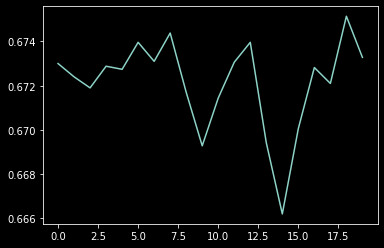

In [47]:
plt.plot(res)

In [50]:
model = load.load('bs_64_sch_cosine_wd_5e-4/bs_64_sch_cosine_wd_5e-4_epoch_300')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())



res= progressive_inj_zero(pfi_model,30,5,step=100)

0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
0.673
1
N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  990.6717000000000001
2
N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  1990.6734600000000001
3
N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  2990.67326
4
N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  3990.67242
5
N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N inject

In [ ]:
name= "bs_64_sch_cosine" + "_prog_inj_zero" + "_3k_step_100"
log.save(res,name)

In [10]:
model = load.load('bs_1024_sch_cosine/bs_1024_sch_cosine_best_acc')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

res= progressive_inj_zero(pfi_model,30,5,step=100)

name= "bs_1024_sch_cosine" + "_prog_inj_zero" + "_3k_step_100"
log.save(res,name)

TypeError: progressive_inj_zero() got multiple values for argument 'step'

In [9]:
model_name = "bs_1024_sch_cosine"
model_exact_name = model_name + "_best_acc"

model = load.load(model_name + '/' + model_exact_name)

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

avg,std= progressive_inj_zero(pfi_model,10000,1000,5)

res = [avg,std]

name= model_name + "_prog_inj_zero" + "_10k_step_1k"
log.save(res,name)

N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  5000
 Injection:  4999N injections:  5000
 Injection:  4999N injections:  5000
 Injection:  4999N injections:  5000
 Injection:  4999N injections:  5000
 Injection: 

In [11]:
res

[[0.7622,
  0.75762,
  0.7577200000000001,
  0.75466,
  0.75684,
  0.74412,
  0.7484999999999999,
  0.75288,
  0.7505400000000001,
  0.73616],
 [0.0,
  0.003547618919782666,
  0.0010906878563548667,
  0.0073904262393991995,
  0.002210520300743678,
  0.010030633080718285,
  0.006793231925968669,
  0.005885031860576462,
  0.006256069053327347,
  0.01114820164869654]]

In [22]:
np.array(res[0]) - np.array(res[1])

array([0.7622    , 0.75407238, 0.75662931, 0.74726957, 0.75462948,
       0.73408937, 0.74170677, 0.74699497, 0.74428393, 0.7250118 ])

In [27]:
mean-standard_dev

array([0.7622    , 0.75407238, 0.75662931, 0.74726957, 0.75462948,
       0.73408937, 0.74170677, 0.74699497, 0.74428393, 0.7250118 ])

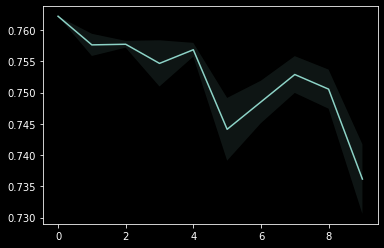

In [46]:
mean= np.array(res[0])
standard_dev= np.array(res[1])/2

y=range(10)

plt.clf()

plt.plot(y,mean)

plt.fill_between(y, mean-standard_dev, mean+standard_dev, alpha = 0.1)

In [26]:
mean

array([0.7622 , 0.75762, 0.75772, 0.75466, 0.75684, 0.74412, 0.7485 ,
       0.75288, 0.75054, 0.73616])

In [ ]:
def testeo():
    return 1,2

res = uno,dos = testeo()

# Weight progressive injections with zero value

In [3]:
model = load.load('bs_1024_sch_plateau/bs_1024_sch_plateau_best_acc')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())




In [5]:
res= progressive_inj_zero(pfi_model,10000,1000)

Injection: 0of 10000
Injection: 1000of 10000
 Injection:  999Injection: 2000of 10000
 Injection:  1999Injection: 3000of 10000
 Injection:  2999Injection: 4000of 10000
 Injection:  3999Injection: 5000of 10000
 Injection:  4999Injection: 6000of 10000
 Injection:  5999Injection: 7000of 10000
 Injection:  6999Injection: 8000of 10000
 Injection:  7999Injection: 9000of 10000
 Injection:  8999

In [6]:
res

([0.8524,
  0.8480000000000001,
  0.84512,
  0.8399800000000001,
  0.8375,
  0.8364,
  0.8315000000000001,
  0.8244400000000001,
  0.83104,
  0.81918],
 [0.0,
  0.0020069877926883434,
  0.002305992194262595,
  0.007850961724527762,
  0.005255473337388387,
  0.003428702378451646,
  0.003909475668168299,
  0.012902185861318215,
  0.005342134404898455,
  0.008621925538996506])

In [12]:
avg

[0.8524,
 0.8480000000000001,
 0.84512,
 0.8399800000000001,
 0.8375,
 0.8364,
 0.8315000000000001,
 0.8244400000000001,
 0.83104,
 0.81918]

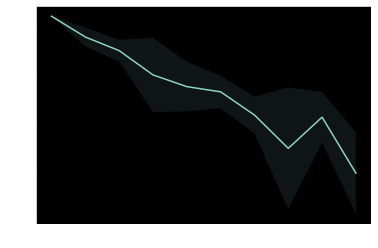

In [26]:
avg = res[0]
std = np.array(res [1])

y=range(len(avg))

plt.clf()

plt.plot(y,avg)

plt.fill_between(y, avg-std, avg+std, alpha = 0.1)

plt.savefig("test2")

In [17]:
utils.save_plt(plt,"test")

<Figure size 432x288 with 0 Axes>

In [25]:
%matplotlib inline
plt.show()
plt.savefig("test3")

<Figure size 432x288 with 0 Axes>

In [21]:
plt.show()

In [ ]:
utils.save_fig_std(avg,std,"test5")

Getting best acc epoch of bs64 cosine

In [37]:
loaded=utils.load("bs_64_sch_cosine_wd_5e-4.json")

In [39]:
len(loaded["test_acc_v"])

300

In [16]:
load["test_acc_v"].index(max(load["test_acc_v"]))

185

Difference between accuracy and loss

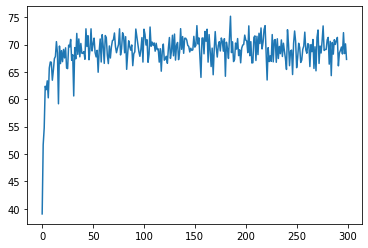

In [18]:
plt.plot(load["test_acc_v"])

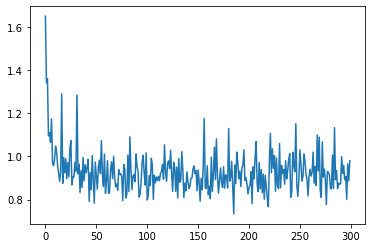

In [19]:
plt.plot(load["test_loss_v"])

In [20]:
load["test_loss_v"].index(min(load["test_loss_v"]))

185

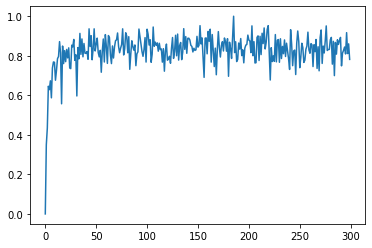

In [65]:
plt.plot(utils.list_norm(loaded["test_acc_v"]))

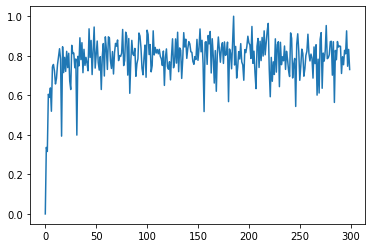

In [67]:
plt.plot(utils.list_norm(-np.array(loaded["test_loss_v"])))

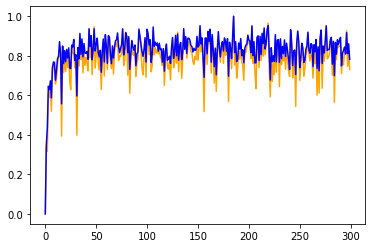

In [72]:
plt.plot(utils.list_norm(-np.array(loaded["test_loss_v"])),color="orange")
plt.plot(utils.list_norm(loaded["test_acc_v"]),color="blue")
plt.show()

Inj for all plateau sch, bs 64, 128, etc..

In [74]:
bs=[64,1024]
sch="cosine"

path="./checkpoints/"+"bs_"+str(bs[0])+"_sch_"+sch
path_best= path + "/"+"bs_"+str(bs[0])+"_sch_"+sch+"_best_acc"

model = model_actions.load(path_best)

In [76]:
pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

res = many_inj.progressive_inj_zero(pfi_model,10,5)

Injection: 0 of 10
Injection: 5 of 10
Injection: 10 of 10


In [10]:
bss=[64,128,256,512,1024]
sch="plateau"

tot=10000
step=1000
n_exp=5

for bs in bss:
    print("Inj for bs: " + str(bs))
    name = "bs_"+str(bs)+"_sch_"+sch
    path="./checkpoints/"+ name
    path_best= path + "/"+"bs_"+str(bs)+"_sch_"+sch+"_best_acc"

    model = model_actions.load(path_best)

    pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

    res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp)
    save_data={}
    save_data["avg"]=res[0]
    save_data["std"]=res[1]
    utils.save(save_data,save_name)

Inj for bs: 64
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000
Inj for bs: 128
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
